In [1]:
import os
from dotenv import load_dotenv
load_dotenv() 
GEMINI_API_KEY = os.getenv("GOOGLE_API_KEY")


In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-001")
response = llm.invoke("tell me about Genererative AI")
response.content

'Okay, let\'s dive into the fascinating world of Generative AI!\n\n**What is Generative AI?**\n\nAt its core, Generative AI refers to a type of artificial intelligence that can create new content.  Instead of just analyzing or predicting based on existing data, it can generate things like text, images, audio, video, code, and even 3D models.  Think of it as AI that can be creative.\n\n**How Does it Work?**\n\nThe magic behind Generative AI lies in machine learning, particularly deep learning models. Here\'s a simplified breakdown:\n\n1.  **Training Data:**  Generative AI models are trained on massive datasets of existing content. For example, an image generation model might be trained on millions of images, or a text generation model on a huge corpus of text from books, articles, and websites.\n\n2.  **Learning Patterns:**  During training, the model learns the underlying patterns, structures, and relationships within the data. It identifies the features and characteristics that define

In [3]:
os.environ['HF_TOKEN']=os.getenv("HF_TOKEN")
os.environ['SERPER_API_KEY']=os.getenv("SERPER_API_KEY")

In [4]:
from langchain_huggingface import HuggingFaceEmbeddings
embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

d:\Agentic AI\my_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("D:\Agentic AI\Assignment_LangGraph3\ed3book.pdf")


In [6]:
documents =  loader.load()

In [7]:
print(type(documents))

<class 'list'>


In [8]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=400)
split_documents = text_splitter.split_documents(documents)

In [9]:
print(f"Number of document chunks after splitting: {len(split_documents)}")


Number of document chunks after splitting: 2904


In [10]:
from langchain.vectorstores import Chroma
vector_store = Chroma.from_documents(
    documents=split_documents,
    embedding=embedding_model,
    collection_name="NLP_Collection"
)


In [11]:
print(f"Number of documents in vector store: {vector_store._collection.count()}")

Number of documents in vector store: 2904


In [12]:
retriever = vector_store.as_retriever(search_kwargs={"k": 3})
response  = retriever.invoke("What is NLP")

In [13]:
for result in response:
    print(result.page_content)

speciﬁc language, at a speciﬁc time, in a speciﬁc place, for a speciﬁc function.
Perhaps the most important dimension of variation is the language. NLP algo-
rithms are most useful when they apply across many languages. The world has 7097
languages at the time of this writing, according to the online Ethnologue catalog
(Simons and Fennig, 2018). It is important to test algorithms on more than one lan-
guage, and particularly on languages with different properties; by contrast there is
an unfortunate current tendency for NLP algorithms to be developed or tested just
on English (Bender, 2019). Even when algorithms are developed beyond English,
they tend to be developed for the ofﬁcial languages of large industrialized nations
(Chinese, Spanish, Japanese, German etc.), but we don’t want to limit tools to just
these few languages. Furthermore, most languages also have multiple varieties, of-
ten spoken in different regions or by different social groups. Thus, for example,
1979).
Nonetheles

## Setting up web tool

In [14]:
from langchain_community.utilities import GoogleSerperAPIWrapper
search = GoogleSerperAPIWrapper()
search.run("What are the tourist place in delhi")

"Top Attractions in New Delhi ; 1. Qutub Minar · 4.5. 13,507 ; 2. Swaminarayan Akshardham · 4.6. 12,058 ; 3. Humayun's Tomb · 4.5. 10,593 ; 4. Gurudwara Bangla Sahib. Seven cities in one · Taj Mahal · New Delhi Parliament House (Sansad Bhavan) · Qutub Minar · Lotus Temple (Bahá'í House of Worship) · India Gate · Humayun's Tomb · Red ... Discover the best attractions in Delhi including Mehrauli Archaeological Park, Humayun's Tomb, and Hazrat Nizam-ud-din Dargah. Tourist Places: Akshardham Temple, Azad Hind Gram, Lotus Temple, Birla Mandir, Dilli Haat, Dilli Haat INA, Dilli Haat Pitampura, Dilli Haat Janakpuri, Garden ... 114 Places To Visit In Delhi · 1. India Gate · 2. Red Fort · 3. Qutub Minar · 4. Lotus Temple. Lotus Temple. Instagram Worthy 4.6 /5. 13 ... Explore the Top 10 Best Places to Visit in Delhi in 2025 with this ultimate India travel guide! From the majestic Red Fort to the bustling ... Museums · Ghalib Museum · Indian War Memorial Museum · Pradhan Mantri Sangrahalaya · Nat

### Defining Pydantic Model

In [15]:
from pydantic import BaseModel, Field

class OutputPasser(BaseModel):
    topic:str=Field(description="Topic selection from the user query")
    reasoning:str=Field(description="Reasoning behind the topic selection")

In [16]:
from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=OutputPasser)
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"topic": {"description": "Topic selection from the user query", "title": "Topic", "type": "string"}, "reasoning": {"description": "Reasoning behind the topic selection", "title": "Reasoning", "type": "string"}}, "required": ["topic", "reasoning"]}\n```'

## Defining type of State

In [67]:
import operator
from typing import List
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

## Defining Agents and nodes - 

In [68]:
# Supervisor Function
from langchain.prompts import PromptTemplate
def supervisor(state:AgentState):
    user_question = state['messages'][0]
    print("User Question", user_question)

    template = """
    Your task is to classify the given user query into one of the following related categories: [NLP,LLM, Latest]. If user question is about 
    Natural language processing(NLP) then NLP, if user question is generic then LLM and if user question is about some recent thing which you don't know then Latest.
    Only respond with the category name and nothing else.
    Strictly Only respond with one of the category names: NLP, LLM, or Latest.

    user question :{user_question}
    {format_instructions}
    """
    prompt = PromptTemplate(
        template=template,
        input_variables=["user_question"],
        partial_variables={"format_instructions":parser.get_format_instructions()}
    )
    
    chain = prompt|llm|parser
    response = chain.invoke({"user_question":user_question})
    print("Response from supervisor chain", response)

    return {"messages":[response.topic]}
    

In [69]:
# Defining router function for supervisor
def supervisor_router(state:AgentState):
    print("Supervisor router is on duty")
    last_message = state['messages'][-1]
    print("last message",last_message)
    
    if "nlp" in last_message.lower():
        return "RAG"
    elif "llm" in last_message.lower():
        return "LLM"
    else:
        return "WEB"

In [70]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [93]:
# RAG Function
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
def NLP_RAG(state:AgentState):
    print("-------------NLP RAG Call-------------")
    user_question = state['messages'][0]
    print("User Question", user_question)
    template = """ You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. 
    If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
    Question: {user_question}
    Context: {context}
    Answer:
    """
    prompt  = PromptTemplate(
        template = template,
        input_variables = ['user_question','context']
    )
    rag_chain = (
        {"context":retriever|format_docs,"user_question":RunnablePassthrough()}
        |prompt
        |llm
        |StrOutputParser
    )
    response  = rag_chain.invoke(user_question)
    print("Response from NLP RAG",response)

    return {"messages":[response]}


In [72]:
def LLM_call(state:AgentState):
    print("-------------LLM Call-------------")
    user_question = state['messages'][0]
    print("User Question", user_question)
    response = llm.invoke(user_question)
    print("Response from LLM call", response.content)

    return {"messages":[response.content]}
    

In [73]:
def WEB_Call(state:AgentState):
    print("-------------WEB Call-------------")
    user_question = state['messages'][0]
    print("User Question", user_question)

    response = search.run(user_question)

    return {"messages":[response]}


In [74]:
from pydantic import BaseModel, Field

class ValidationOutputPasser(BaseModel):
    Validation_Result:str=Field(description="Result from the overall validation of the output")
    Validation_reasoning:str=Field(description="Reasoning behind the validation od output")

In [75]:
from langchain.output_parsers import PydanticOutputParser
Validation_Parser = PydanticOutputParser(pydantic_object=ValidationOutputPasser)
Validation_Parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Validation_Result": {"description": "Result from the overall validation of the output", "title": "Validation Result", "type": "string"}, "Validation_reasoning": {"description": "Reasoning behind the validation od output", "title": "Validation Reasoning", "type": "string"}}, "required": ["Validation_Result", "Validation_reasoning"]}\n```'

In [76]:
from langchain.prompts import PromptTemplate
def Validation_Process(state:AgentState):
    print("-------Validation process has started---------")
    user_question = state['messages'][0]
    system_answer = state['messages'][-1]

    template= """
    Your task is to check if the response is related to the user question. 
    Only respond with Apporved or Denied and nothing else.

    User query: {user_question}
    response: {system_answer}
    {format_instructions}
    """
    prompt = PromptTemplate(
        template = template,
        input_variables=['user_question','system_answer'],
        partial_variables={"format_instructions":Validation_Parser.get_format_instructions()}
    )
    validation_chain = prompt|llm|Validation_Parser

    result = validation_chain.invoke({"user_question":user_question, "system_answer":system_answer})
    print("Result from validation process", result)

    return {"messages":[result.Validation_Result]}
    

In [87]:
# Defining router function for validation node
def validation_router(state:AgentState):
    print("Validation router is on duty")
    last_message = state['messages'][-1]
    if "approved" in last_message.lower():
        return "Approved"
    else:
        return "Denied"

In [78]:
def Final_Output(state:AgentState):
    print("---------Final output---------")
    print(f"Here is the final output for the user question {state['messages'][0]}:---> {state['messages'][-1]}")

## Defining Worflow using StateGraph

In [85]:
from langgraph.graph import StateGraph,END, START
WorkFlow = StateGraph(AgentState)

In [86]:
# Adding Nodes
WorkFlow.add_node("Supervisor",supervisor)
WorkFlow.add_node("RAG Call",NLP_RAG)
WorkFlow.add_node("LLM Call",LLM_call)
WorkFlow.add_node("WEB Call",WEB_Call)
WorkFlow.add_node("Validation Node",Validation_Process)
WorkFlow.add_node("Final output",Final_Output)
WorkFlow.set_entry_point("Supervisor")


In [88]:
# Adding edges
WorkFlow.add_conditional_edges(
    "Supervisor",
    supervisor_router,
    {
        "RAG":"RAG Call",
        "WEB":"WEB Call",
        "LLM":"LLM Call"
    }
)


In [89]:
WorkFlow.add_edge("RAG Call","Validation Node")
WorkFlow.add_edge("WEB Call","Validation Node")
WorkFlow.add_edge("LLM Call","Validation Node")

WorkFlow.add_conditional_edges(
    "Validation Node",
    validation_router,
    {
        "Approved":"Final output",
        "Denied":"Supervisor"
    }
)
WorkFlow.add_edge("Final output",END)

In [90]:
# Compiling the Graph
app = WorkFlow.compile()


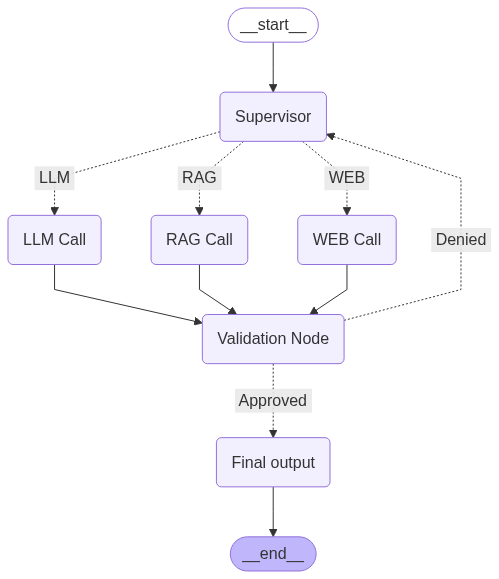

In [34]:
app

In [91]:
state = {"messages": ["Hello"]}
app.invoke(state)

User Question Hello
Response from supervisor chain topic='LLM' reasoning="The user query is a generic greeting and doesn't pertain to NLP or any specific recent topic."
Supervisor router is on duty
last message LLM
-------------LLM Call-------------
User Question Hello
Response from LLM call Hello there! How can I help you today?
-------Validation process has started---------
Result from validation process Validation_Result='Approved' Validation_reasoning="The response acknowledges the user's greeting and offers assistance, indicating a direct relation to the user's query."
Validation router is on duty
---------Final output---------
Here is the final output for the user question Hello:---> Approved


{'messages': ['Hello',
  'LLM',
  'Hello there! How can I help you today?',
  'Approved']}

In [92]:
state = {"messages": ["What is Natural language processing"]}
app.invoke(state)

User Question What is Natural language processing
Response from supervisor chain topic='NLP' reasoning='The user question is directly asking about the definition of Natural Language Processing.'
Supervisor router is on duty
last message NLP
-------------NLP RAG Call-------------
User Question What is Natural language processing


KeyError: "Input to PromptTemplate is missing variables {'user_question'}.  Expected: ['context', 'user_question'] Received: ['context', 'question']\nNote: if you intended {user_question} to be part of the string and not a variable, please escape it with double curly braces like: '{{user_question}}'.\nFor troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_PROMPT_INPUT "